# Supervised vs unsupervised learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)
pixel_values = pixel_values.values

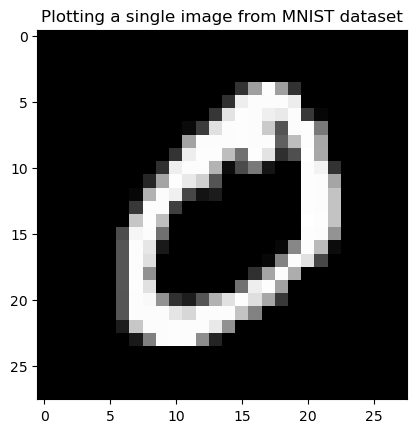

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')
plt.title("Plotting a single image from MNIST dataset");

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.targets = tsne_df.targets.astype(int)
tsne_df.head(10)

,x,y,targets
0,18.063921,-8.375342,5
1,55.886135,-2.409787,0
2,1.331996,-53.401012,4
3,-43.574341,8.844009,1
4,-8.239950,-31.717669,9
5,-4.534781,27.923727,2
6,-24.162596,44.215679,1
7,9.401499,13.561679,3
8,-24.571171,38.910419,1
9,-13.426233,-14.966998,4


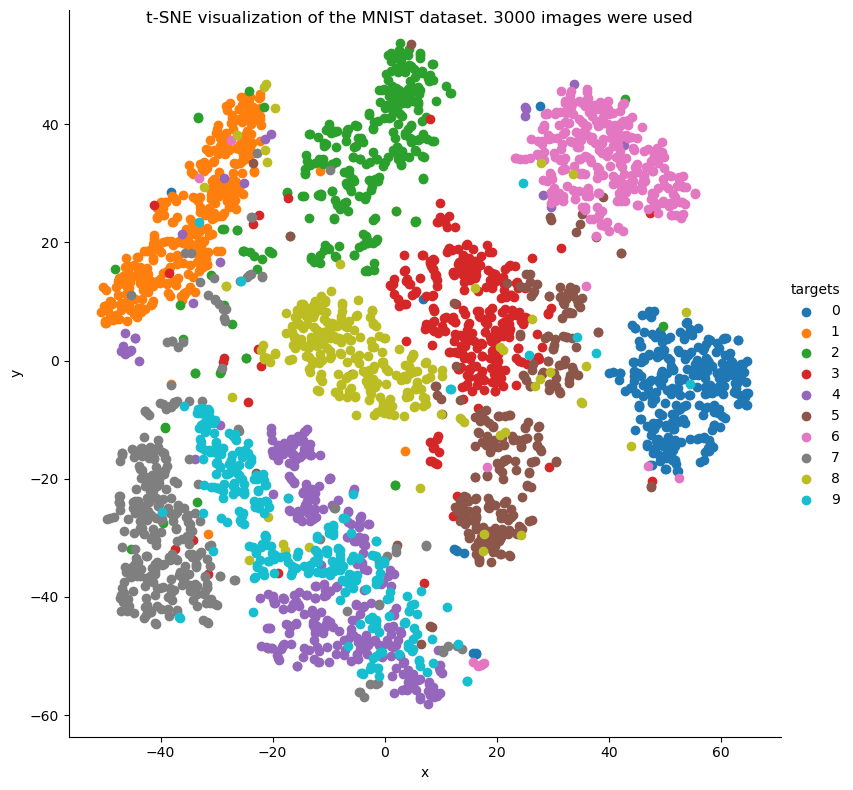

In [6]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)

grid.map(plt.scatter, "x", "y").add_legend()
grid.fig.suptitle("t-SNE visualization of the MNIST dataset. 3000 images were used");